In [14]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
adata = sc.read_loom('/data/xyzeq/xyzeq/individual.raw.and.proc.h5ads/20200324/L20C1_mouse_wTSNE.loom')

In [3]:
adata.obs

,CellType,barcode,cell_call,human_counts,leiden,log_counts,louvain,mouse_counts,n_counts,n_genes,percent_contam,percent_mito_human,percent_mito_mouse,ratio
L20C1_P1A01F.CTCATACCTGCTACCT,Hepatocyte,CTCATACCTGCTACCT,M,537.0,1,3.771514,9,5372.0,5909.0,1859,8.529362,0.016923,0.000000,1.000162
L20C1_P1A01F.CTAGGTCTAGTGCAAT,Kupffer,CTAGGTCTAGTGCAAT,C,162.0,10,2.800717,6,470.0,632.0,297,11.392405,0.000000,0.158228,0.462583
L20C1_P1A01F.GCGCTCCTTCCGCTAA,Hepatocyte,GCGCTCCTTCCGCTAA,M,274.0,1,3.184691,0,1256.0,1530.0,607,13.267975,0.065359,0.065359,0.661239
L20C1_P1A01F.GACGACACGCTCACTC,Lymphocyte,GACGACACGCTCACTC,C,173.0,12,2.761928,10,405.0,578.0,249,11.245675,0.000000,0.519031,0.369409
L20C1_P1A02F.CGATAGCCTTATTGCT,MSC,CGATAGCCTTATTGCT,M,20.0,15,2.857332,8,700.0,720.0,395,3.611111,0.000000,0.000000,1.544068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L20C1_P4H12F.GGTAATGACTTGCAGA,mc38,GGTAATGACTTGCAGA,M,93.0,0,3.567732,1,3603.0,3696.0,1301,6.277056,0.000000,0.649351,1.588181
L20C1_P4H12F.GAGACATCCGGTATAC,Macrophage,GAGACATCCGGTATAC,M,13.0,5,2.745855,5,544.0,557.0,212,4.847397,0.000000,0.000000,1.621656
L20C1_P4H12F.TTGGACGTGAGATAGT,mc38,TTGGACGTGAGATAGT,M,17.0,0,2.978180,1,934.0,951.0,365,1.997897,0.000000,0.000000,1.739898
L20C1_P4H12F.TCCACTGGAGTGTCGC,Macrophage,TCCACTGGAGTGTCGC,M,10.0,5,2.808211,5,633.0,643.0,266,4.043546,0.000000,0.000000,1.801404


In [20]:
df = adata.obs.copy()

In [21]:
df['n_counts'] = np.log10(df['n_counts'].values)
# df['n_genes'] = np.log10(df['n_genes'].values)

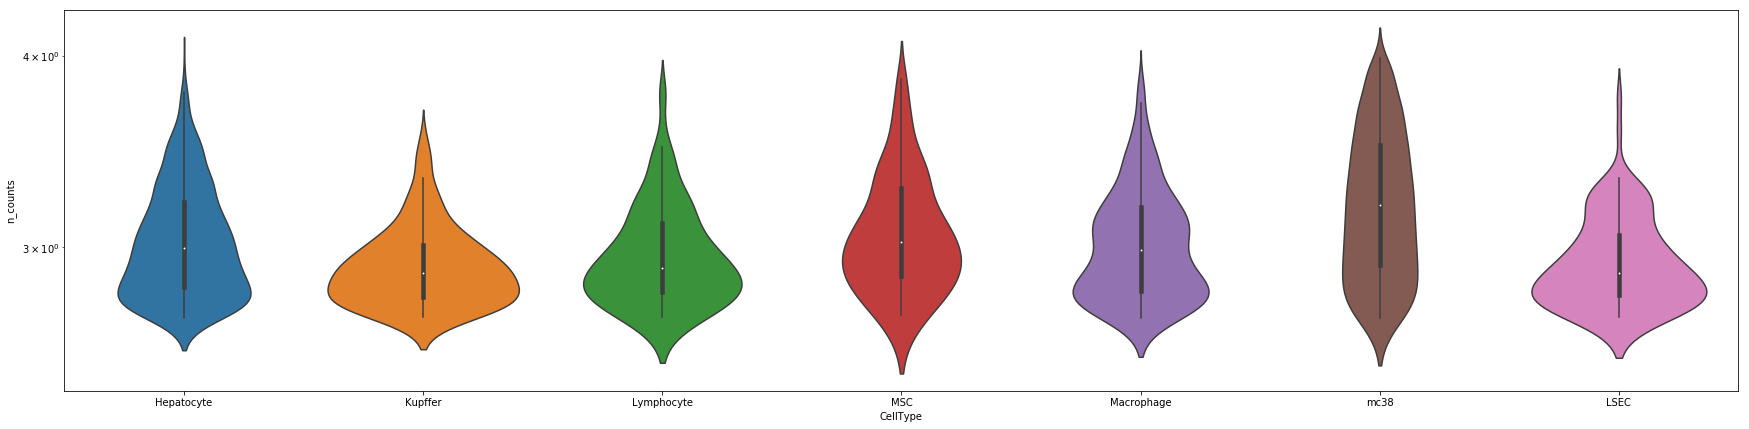

In [22]:
plt.figure(figsize=(30,7))
sns.violinplot(data=df, x='CellType',y='n_counts');
plt.yscale('log');

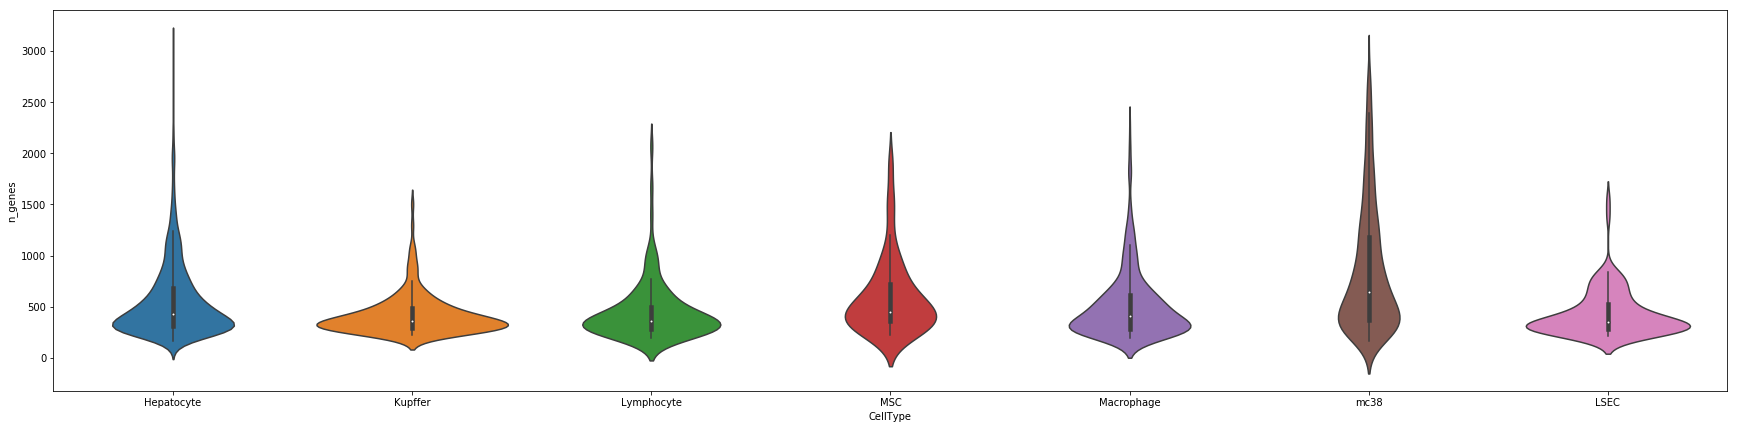

In [24]:
plt.figure(figsize=(30,7))
sns.violinplot(data=df, x='CellType',y='n_genes');

In [27]:
for ct in df['CellType'].unique():
    print(ct + ": " + str(df[df['CellType'] == ct]['n_counts'].mean()))

Hepatocyte: 3.044765458410314
Kupffer: 2.9257852811235603
Lymphocyte: 2.9787438684436167
MSC: 3.085403093389119
Macrophage: 3.03134093535313
mc38: 3.2288450890275655
LSEC: 2.943472632050146


In [28]:
for ct in df['CellType'].unique():
    print(ct + ": " + str(df[df['CellType'] == ct]['n_genes'].mean()))

Hepatocyte: 552.2353951890034
Kupffer: 420.27777777777777
Lymphocyte: 454.4173913043478
MSC: 594.439024390244
Macrophage: 511.5290023201856
mc38: 851.3800505050505
LSEC: 431.6116504854369
